# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [2]:
# you are free to use any package you deem fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [3]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

Determine if it's classification problem or regression problem

In [4]:
set(Y)

{0, 1}

So it's a binary regression.

We start with logistic regression (which assume linear boundary. No need to apply SVM or neural network now). Before that, we should seperate training and testing data. 80% for training and 20% for testing.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 1.33003698 -3.06091158]]
[2.25377405]


Our result is following:
$y=\mathbf{1}(h_{\theta}(\theta^{T}x+b)>0.5)$ where $\theta=(1.33003698, 3.06091158)^{T}$, $b=2.25377405$

## Testing / Optimization

Now let's test the model on the testing set.

In [7]:
def h(x)->bool:
    return (1.33003698*x[0]-3.06091158*x[1]+2.25377405)>0.5

In [8]:
correct_count=0
wrong_count=0
for i in range(100):
    cur_y=h(X_test[i])
    if cur_y==y_test[i]:
        correct_count+=1
    else:
        wrong_count+=1
print(correct_count, wrong_count)

92 8


## Performance Analysis

Correct rate is 92%, which is sort of good.

Here's some figures that can also illustrate our result.

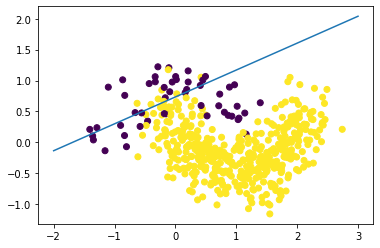

In [9]:
plt.scatter(X.T[0], X.T[1], c=[Y])
lx=np.linspace(-2,3,100)
ly=(1.33/3.06)*lx+(2.25/3.06)
plt.plot(lx,ly)

We can see that the line tries its best to seperate most of the points correctly. However, a non-linear boundary may seems to be better from the figure. Let's try SVM with kernel method, which can give us non-linear boundary.

In [10]:
from sklearn import svm
clf = svm.SVC().fit(X_train, y_train)
correct_count=0
wrong_count=0
for i in range(100):
    cur_y=clf.predict([X_test[i]])
    if cur_y==y_test[i]:
        correct_count+=1
    else:
        wrong_count+=1
print(correct_count, wrong_count)

95 5


So SVM indeed inproves the model.

That's the end of our analysis.

I do not have previous ML experience, including EECS 445 project experience (I'm currently taking EECS 445). Most of the functions I use come from sklearn official guide and stackoverflow.